In [1]:
from rdkit import Chem
from rdkit import DataStructs
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt 

In [2]:
## Matplotlib defaults ##
colors = {"1980": "#aa0f35", 
         "1985": "#fdc799",
         "1990": "#abdbfc",
         "1995": "#a0a75c",
         "2000": "#603734",
         "2005": "#009ecb",
         "2010": "#430057",
         "2015": "#f89b00"}

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rcParams.update({'font.size': 22})

In [3]:
#Random test - adenine & guanine tanimoto similarity
adenine = Chem.RDKFingerprint(Chem.MolFromInchi("InChI=1S/C5H5N5/c6-4-3-5(9-1-7-3)10-2-8-4/h1-2H,(H3,6,7,8,9,10)"))
guanine = Chem.RDKFingerprint(Chem.MolFromInchi("InChI=1S/C5H5N5O/c6-5-9-3-2(4(11)10-5)7-1-8-3/h1H,(H4,6,7,8,9,10,11)"))

print(DataStructs.FingerprintSimilarity(adenine,guanine))

0.15552099533437014


Testing: Tanimoto similarity across 1980-1984 top 100 degree compounds

In [3]:
""" Creates a heatmap given a filename of a pickled np matrix """
def heatmap(m):
    #Make it symmetrical (for visualizations)
    i_lower = np.tril_indices(len(m), -1)
    m[i_lower] = m.T[i_lower]
    
    plt.imshow(m)

In [6]:
def plot_similarity_heatmap(start, stop):
    #Read & sort dataframe
    df = pd.read_csv("G:/Shared drives/SureChemBL_Patents/Cpd_Data/highest_degree_data_" + 
                     str(start) + "_" + str(stop) + "_1000.csv")
    df = df.sort_values(by="degree", ascending=False)
    
    #Find RDKit fingerprints of all viable inchis
    fps = []
    for inchi in df["InChI"]:
        try:
            fps.append(Chem.RDKFingerprint(Chem.MolFromInchi(inchi)))
        except: #if an inchi is not viable, skip it
            pass
        
    #Set up matrix & combinations
    matrix = np.zeros((len(fps), len(fps)))
    combinations = itertools.combinations(np.arange(0,len(fps),1),2)
    
    #Calculate Tanimoto similarity between all fingerprints
    for c in combinations:
        matrix[c[0]][c[1]] = DataStructs.FingerprintSimilarity(fps[c[0]],fps[c[1]])
        
    #Plot figure
    plt.figure(figsize=(10,10))
    heatmap(matrix)
    plt.ylabel("Degree Order")
    plt.xlabel("Degree Order")
    plt.suptitle(str(start) + "-" + str(stop) + " Tanimoto Similarity")
    plt.title("Ordered by Degree", fontsize="16")

In [26]:
def plot_similarity_distribution(start, stop, ax):
    #Read & sort dataframe
    df = pd.read_csv("G:/Shared drives/SureChemBL_Patents/Cpd_Data/highest_degree_data_" + 
                     str(start) + "_" + str(stop) + "_1000.csv")
    df = df.sort_values(by="degree", ascending=False)
    
    #Find RDKit fingerprints of all viable inchis
    fps = []
    for inchi in df["InChI"]:
        try:
            fps.append(Chem.RDKFingerprint(Chem.MolFromInchi(inchi)))
        except: #if an inchi is not viable, skip it
            pass
        
    #Set up distribution list & combinations
    sim_dist = []
    combinations = itertools.combinations(np.arange(0,len(fps),1),2)
    
    #Calculate Tanimoto similarity between all fingerprints
    for c in combinations:
        sim_dist.append(DataStructs.FingerprintSimilarity(fps[c[0]],fps[c[1]]))
    
    #Sort distribution
    sim_dist.sort(reverse=True)
        
    #Plot figure
    ax.scatter(x=np.arange(0,len(sim_dist),1), y=sim_dist, alpha=0.1, label=str(start) + " - " + str(stop))

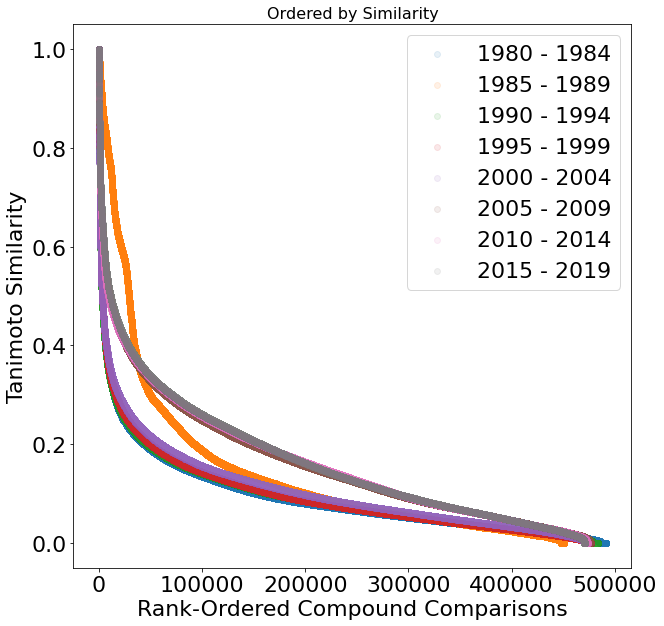

In [27]:
fig, ax = plt.subplots(figsize=(10,10))

plot_similarity_distribution(1980, 1984, ax)
plot_similarity_distribution(1985, 1989, ax)
plot_similarity_distribution(1990, 1994, ax)
plot_similarity_distribution(1995, 1999, ax)
plot_similarity_distribution(2000, 2004, ax)
plot_similarity_distribution(2005, 2009, ax)
plot_similarity_distribution(2010, 2014, ax)
plot_similarity_distribution(2015, 2019, ax)

plt.ylabel("Tanimoto Similarity")
plt.xlabel("Rank-Ordered Compound Comparisons")
plt.legend()
plt.show()

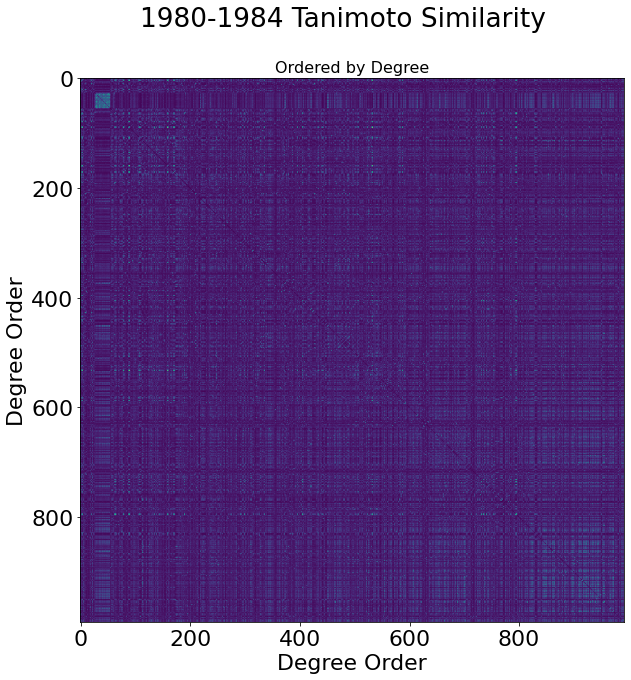

In [5]:
plot_similarity_heatmap(1980, 1984)

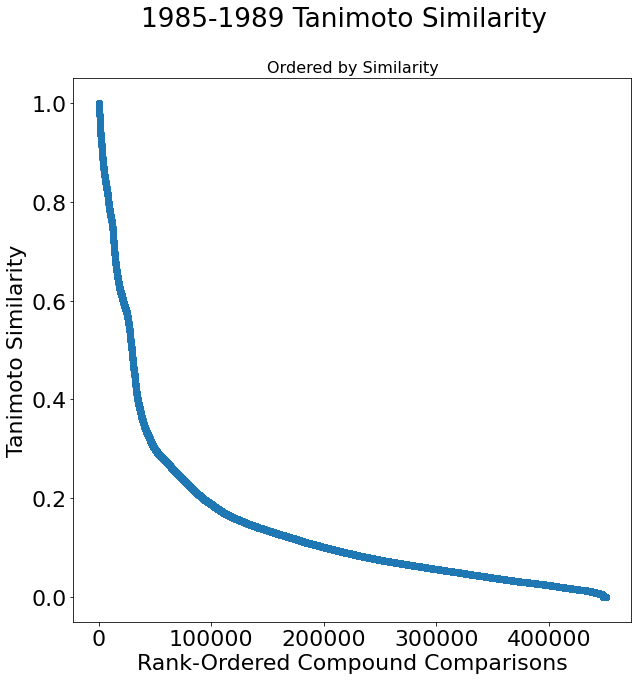

In [17]:
plot_similarity_distribution(1985, 1989)

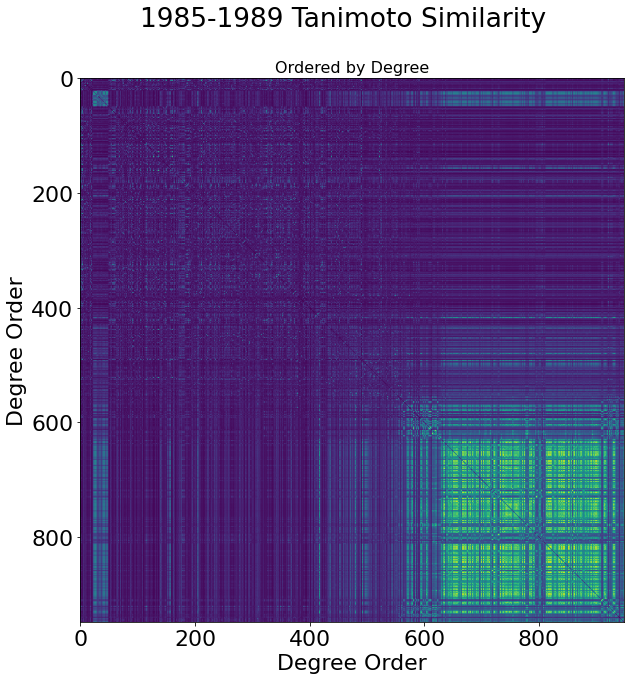

In [57]:
plot_similarity(1985, 1989)

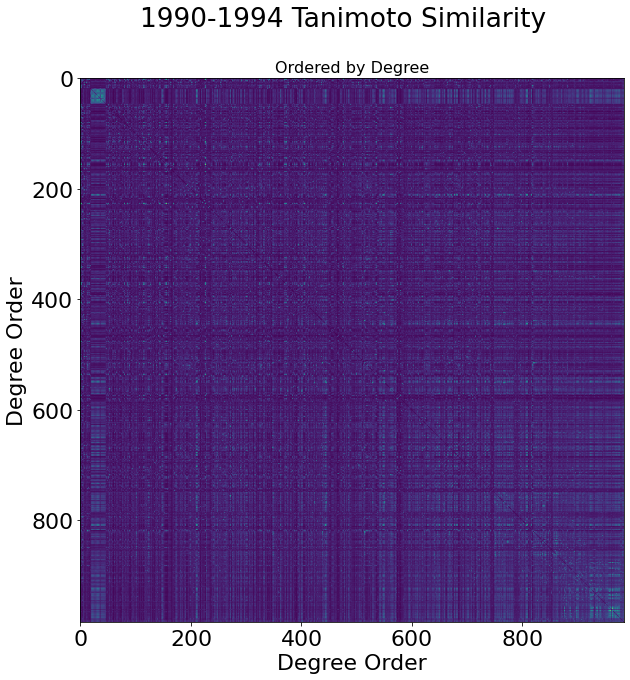

In [58]:
plot_similarity(1990, 1994)

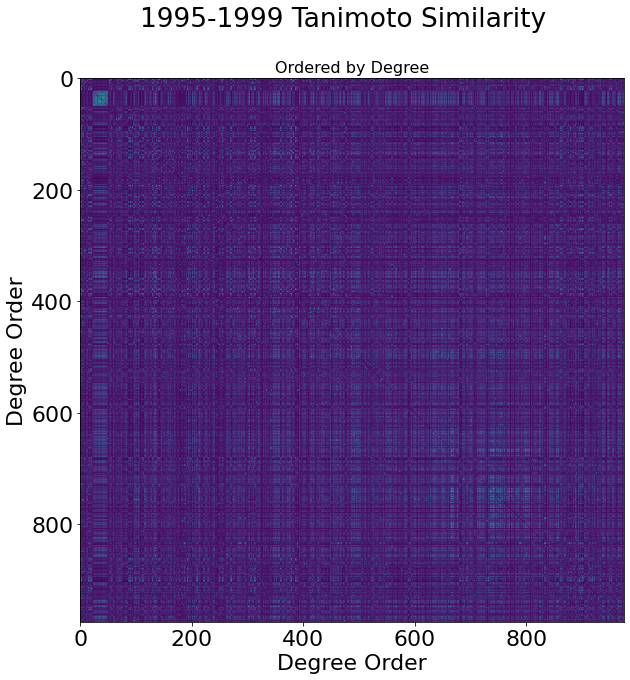

In [59]:
plot_similarity(1995, 1999)

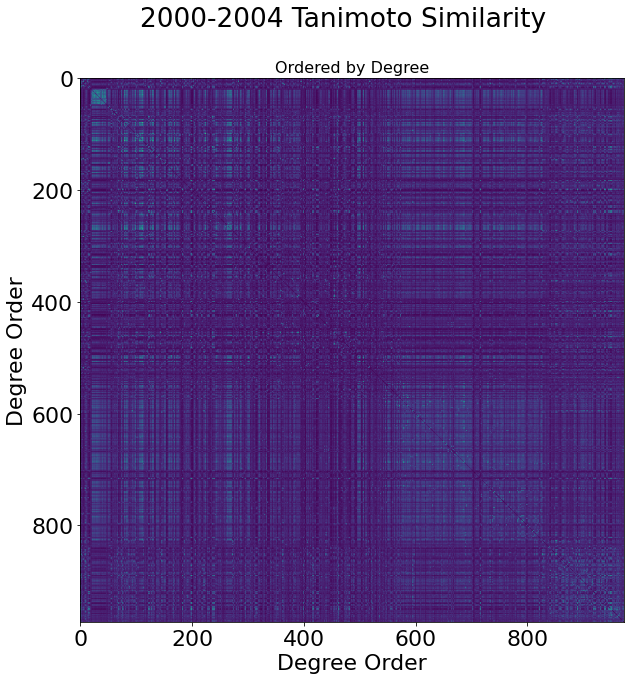

In [60]:
plot_similarity(2000, 2004)

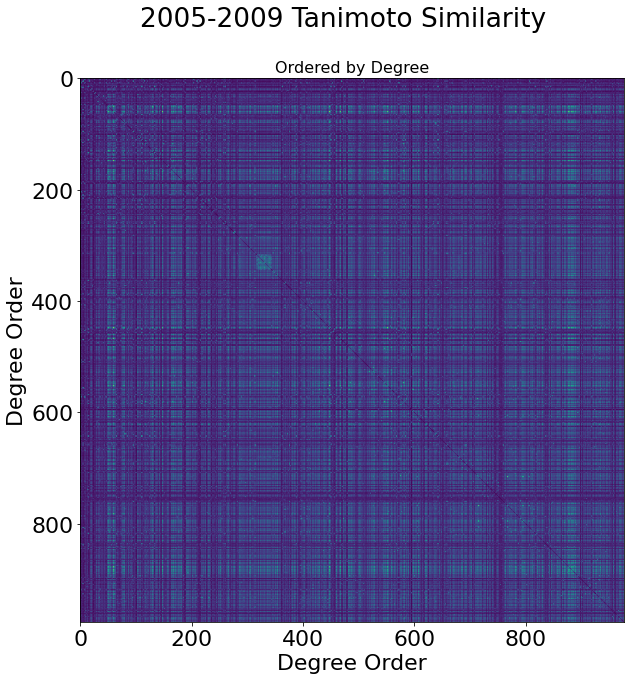

In [61]:
plot_similarity(2005, 2009)

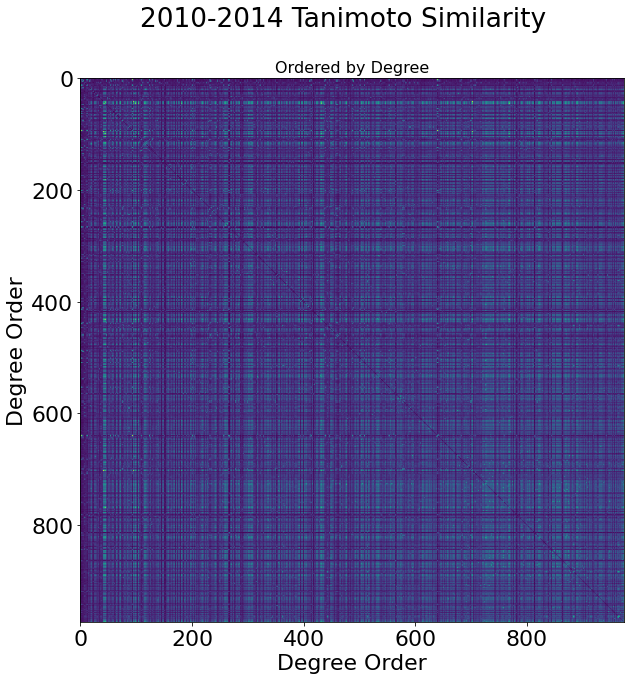

In [62]:
plot_similarity(2010, 2014)

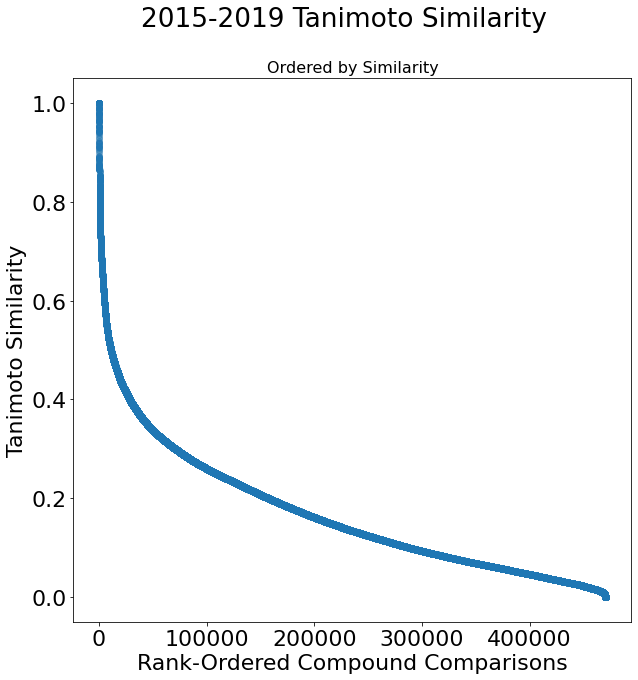

In [18]:
plot_similarity_distribution(2015, 2019)

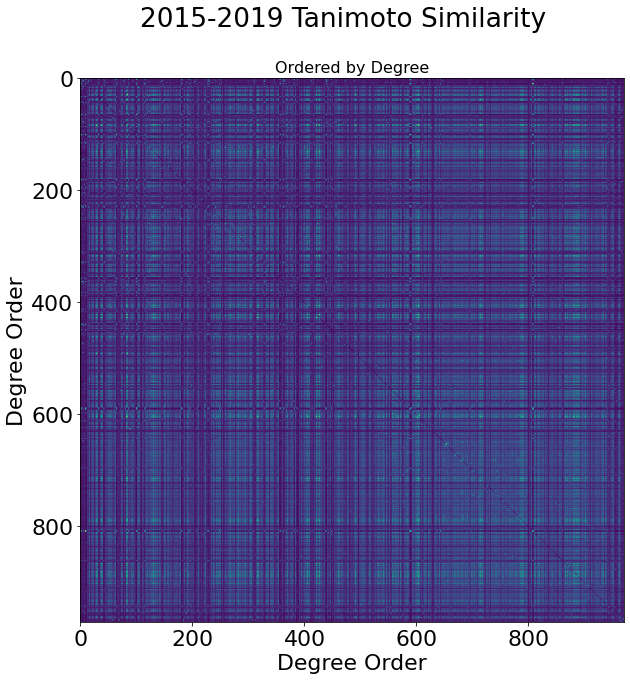

In [63]:
plot_similarity(2015, 2019)